<a href="https://colab.research.google.com/github/hoashalarajh/python-code/blob/main/CNN_model_for_FER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research on FER

In [1]:
# import necessary library dependencies
import numpy as np
import pandas as pd
from tensorflow import keras


## Reading Labels

In [2]:
# Mount the google dirve
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# import pandas to read csv file
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/sample_labels/labels.csv', index_col = False)

FileNotFoundError: ignored

In [ ]:
# summmary of lables
df.head(10)

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,Fear,279,86,381,421,scenesbridFear2215.png,1280,720
1,Fear,583,96,302,408,scenesbridFear22235.png,1280,720
2,Fear,589,88,312,440,scenesbridFear22240.png,1280,720
3,Fear,564,92,317,459,scenesbridFear22245.png,1280,720
4,Fear,551,92,332,468,scenesbridFear22250.png,1280,720
5,Fear,553,90,334,455,scenesbridFear22255.png,1280,720
6,Fear,534,88,338,449,scenesbridFear22260.png,1280,720
7,Fear,430,94,481,449,scenesbridFear22340.png,1280,720
8,Fear,446,92,461,440,scenesbridFear22345.png,1280,720
9,Fear,289,90,410,430,scenesbridFear2235.png,1280,720


In [ ]:
# getting classes of face expressions
classes = df['label_name']
print(classes)
# getting unique classes
FER_Classes = np.unique(classes)
print (f"\nThe FER Classes are : \n{FER_Classes}")

0          Fear
1          Fear
2          Fear
3          Fear
4          Fear
         ...   
550       Anger
551     Neutral
552    Surprise
553     Neutral
554     Neutral
Name: label_name, Length: 555, dtype: object

The FER Classes are : 
['Anger' 'Fear' 'Happy' 'Neutral' 'Sad' 'Surprise' 'Unrecognizable']


In [ ]:
# dropping image_height and Image_width cols and label_name
df_new = df.drop(["image_width", "image_height", "label_name"], axis = "columns")
df_new.head(10)

,bbox_x,bbox_y,bbox_width,bbox_height,image_name
0,279,86,381,421,scenesbridFear2215.png
1,583,96,302,408,scenesbridFear22235.png
2,589,88,312,440,scenesbridFear22240.png
3,564,92,317,459,scenesbridFear22245.png
4,551,92,332,468,scenesbridFear22250.png
5,553,90,334,455,scenesbridFear22255.png
6,534,88,338,449,scenesbridFear22260.png
7,430,94,481,449,scenesbridFear22340.png
8,446,92,461,440,scenesbridFear22345.png
9,289,90,410,430,scenesbridFear2235.png


In [ ]:
df_new_sorted = df_new.sort_values('image_name')
df_new_sorted.head(10, )

,bbox_x,bbox_y,bbox_width,bbox_height,image_name
357,683,96,321,425,sceneBFWAngr002102.png
362,1055,118,96,115,sceneBFWAngr002102.png
361,566,169,119,162,sceneBFWAngr002102.png
358,77,128,321,385,sceneBFWAngr002102.png
359,370,309,126,204,sceneBFWAngr002102.png
360,483,269,119,160,sceneBFWAngr002102.png
363,47,124,349,427,sceneBFWAngr002108.png
364,395,301,93,215,sceneBFWAngr002108.png
365,474,252,100,172,sceneBFWAngr002108.png
366,561,171,125,174,sceneBFWAngr002108.png


In [ ]:
print (f"The shape of the label data set is : {df_new.shape}")

The shape of the label data set is : (555, 5)


In [ ]:
# feature names
df_new_sorted.columns

Index(['bbox_x', 'bbox_y', 'bbox_width', 'bbox_height', 'image_name'], dtype='object')

In [ ]:
# Exporing df_new_sorted to a .csv file ===> only has image name and bounding box data
df_new_sorted.to_csv('file_name.csv', index=False)

## Downloading Images

In [ ]:
data_path = '/content/drive/My Drive/resized/'


In [ ]:
import cv2

In [ ]:
import os
dir_list = os.listdir(data_path)
dir_list.sort()
print (type(dir_list));print (dir_list)

<class 'list'>
['sceneBFWAngr002102.png', 'sceneBFWAngr002108.png', 'sceneBFWAngr002114.png', 'sceneBFWAngr00212.png', 'sceneBFWAngr002120.png', 'sceneBFWAngr002126.png', 'sceneBFWAngr002132.png', 'sceneBFWAngr002138.png', 'sceneBFWAngr002144.png', 'sceneBFWAngr002150.png', 'sceneBFWAngr002156.png', 'sceneBFWAngr002162.png', 'sceneBFWAngr002168.png', 'sceneBFWAngr002174.png', 'sceneBFWAngr00218.png', 'sceneBFWAngr002180.png', 'sceneBFWAngr002186.png', 'sceneBFWAngr002192.png', 'sceneBFWAngr002198.png', 'sceneBFWAngr002204.png', 'sceneBFWAngr002210.png', 'sceneBFWAngr002216.png', 'sceneBFWAngr002222.png', 'sceneBFWAngr002228.png', 'sceneBFWAngr00224.png', 'sceneBFWAngr00230.png', 'sceneBFWAngr00236.png', 'sceneBFWAngr00242.png', 'sceneBFWAngr00248.png', 'sceneBFWAngr00254.png', 'sceneBFWAngr0026.png', 'sceneBFWAngr00260.png', 'sceneBFWAngr00266.png', 'sceneBFWAngr00272.png', 'sceneBFWAngr00278.png', 'sceneBFWAngr00284.png', 'sceneBFWAngr00290.png', 'sceneBFWAngr00296.png', 'sceneBFWHapp

In [ ]:
# storing images
img_data_list = []

In [ ]:
for i in range((len(dir_list))):
  input_img=cv2.imread(data_path + dir_list[i])
  input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
  #input_img_resize=cv2.resize(input_img,(128,128))
  img_data_list.append(input_img)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

(264, 128, 128)


image number is : 213


Text(0.5, 1.0, 'scenesRehSad270.png')

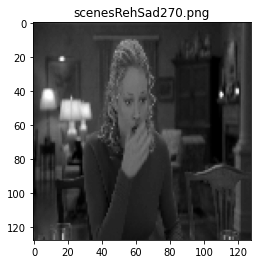

In [ ]:
import random
index = random.randrange(0,264)
print (f"image number is : {index}")
first_img = img_data[202]
first_img

# plotting image
import matplotlib.pyplot as plt
plt.imshow(first_img, cmap = 'gray')
plt.title(dir_list[index])

In [ ]:
df_new_sorted

,bbox_x,bbox_y,bbox_width,bbox_height,image_name
357,683,96,321,425,sceneBFWAngr002102.png
362,1055,118,96,115,sceneBFWAngr002102.png
361,566,169,119,162,sceneBFWAngr002102.png
358,77,128,321,385,sceneBFWAngr002102.png
359,370,309,126,204,sceneBFWAngr002102.png
...,...,...,...,...,...
11,374,92,446,451,scenesbridFear22355.png
12,359,92,436,478,scenesbridFear22360.png
13,364,94,419,451,scenesbridFear22365.png
14,315,92,427,408,scenesbridFear2255.png


In [ ]:
y = df_new_sorted[['bbox_x', 'bbox_y', 'bbox_width', 'bbox_height']]
y

,bbox_x,bbox_y,bbox_width,bbox_height
357,683,96,321,425
362,1055,118,96,115
361,566,169,119,162
358,77,128,321,385
359,370,309,126,204
...,...,...,...,...
11,374,92,446,451
12,359,92,436,478
13,364,94,419,451
14,315,92,427,408


In [ ]:
y_arr = y.to_numpy()
y_arr

array([[ 683,   96,  321,  425],
       [1055,  118,   96,  115],
       [ 566,  169,  119,  162],
       ...,
       [ 364,   94,  419,  451],
       [ 315,   92,  427,  408],
       [ 347,   94,  423,  400]])

In [ ]:
y_arr.shape

(555, 4)

In [ ]:
y_arr[0]

array([683,  96, 321, 425])

In [ ]:
img_names = df_new_sorted['image_name']
img_names
#type(img_names[0])


357     sceneBFWAngr002102.png
362     sceneBFWAngr002102.png
361     sceneBFWAngr002102.png
358     sceneBFWAngr002102.png
359     sceneBFWAngr002102.png
                ...           
11     scenesbridFear22355.png
12     scenesbridFear22360.png
13     scenesbridFear22365.png
14      scenesbridFear2255.png
15      scenesbridFear2270.png
Name: image_name, Length: 555, dtype: object

In [ ]:
FER_Classes

array(['Anger', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise',
       'Unrecognizable'], dtype=object)

In [ ]:
classes

0          Fear
1          Fear
2          Fear
3          Fear
4          Fear
         ...   
550       Anger
551     Neutral
552    Surprise
553     Neutral
554     Neutral
Name: label_name, Length: 555, dtype: object

In [ ]:
count = 0
for i in FER_Classes:
  for j in classes:
    if i == j:
      count = count + 1

  print (i, count)
  count = 0

  

Anger 40
Fear 23
Happy 140
Neutral 192
Sad 45
Surprise 58
Unrecognizable 57


In [ ]:
global_max = []
count = 0
for i in dir_list:
  for j in img_names:
    if i == j:
      count = count + 1
      global_max.append(count)

  print (i, count) 
  count = 0


print (f"Maximum bounding box in an image is : {max(global_max)}")

sceneBFWAngr002102.png 6
sceneBFWAngr002108.png 6
sceneBFWAngr002114.png 6
sceneBFWAngr00212.png 5
sceneBFWAngr002120.png 6
sceneBFWAngr002126.png 6
sceneBFWAngr002132.png 6
sceneBFWAngr002138.png 5
sceneBFWAngr002144.png 6
sceneBFWAngr002150.png 6
sceneBFWAngr002156.png 6
sceneBFWAngr002162.png 6
sceneBFWAngr002168.png 6
sceneBFWAngr002174.png 6
sceneBFWAngr00218.png 5
sceneBFWAngr002180.png 6
sceneBFWAngr002186.png 5
sceneBFWAngr002192.png 5
sceneBFWAngr002198.png 5
sceneBFWAngr002204.png 5
sceneBFWAngr002210.png 6
sceneBFWAngr002216.png 5
sceneBFWAngr002222.png 5
sceneBFWAngr002228.png 5
sceneBFWAngr00224.png 4
sceneBFWAngr00230.png 4
sceneBFWAngr00236.png 4
sceneBFWAngr00242.png 4
sceneBFWAngr00248.png 4
sceneBFWAngr00254.png 4
sceneBFWAngr0026.png 4
sceneBFWAngr00260.png 5
sceneBFWAngr00266.png 5
sceneBFWAngr00272.png 5
sceneBFWAngr00278.png 5
sceneBFWAngr00284.png 6
sceneBFWAngr00290.png 4
sceneBFWAngr00296.png 6
sceneBFWHapp001102.png 3
sceneBFWHapp001108.png 3
sceneBFWHapp00111

In [ ]:
output = np.zeros((264, 6, 4))
print(output.shape)
output[263]

(264, 6, 4)


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
row = 0
num = 0
for i in dir_list:
  for j in img_names:
    if i == j:
      output[num][row] = y_arr[row]
      row = row + 1
  num = num + 1
  row = 0



print (num)
print (output.shape)
print (output)

264
(264, 6, 4)
[[[ 683.   96.  321.  425.]
  [1055.  118.   96.  115.]
  [ 566.  169.  119.  162.]
  [  77.  128.  321.  385.]
  [ 370.  309.  126.  204.]
  [ 483.  269.  119.  160.]]

 [[ 683.   96.  321.  425.]
  [1055.  118.   96.  115.]
  [ 566.  169.  119.  162.]
  [  77.  128.  321.  385.]
  [ 370.  309.  126.  204.]
  [ 483.  269.  119.  160.]]

 [[ 683.   96.  321.  425.]
  [1055.  118.   96.  115.]
  [ 566.  169.  119.  162.]
  [  77.  128.  321.  385.]
  [ 370.  309.  126.  204.]
  [ 483.  269.  119.  160.]]

 ...

 [[ 683.   96.  321.  425.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]]

 [[ 683.   96.  321.  425.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]]

 [[ 683.   96.  321.  425.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.  

In [ ]:
# checking
output[263]

array([[683.,  96., 321., 425.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.]])

In [ ]:
X = img_data
print (f"Shape of X is : {X.shape}")
y = output
print (f"Shape of y is : {y.shape}")

Shape of X is : (264, 128, 128)
Shape of y is : (264, 6, 4)


In [ ]:
testing = np.ones([6,4])
print(testing)
testing.reshape(24,1)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
y1 = y.reshape(264,1,24)
print (y1[0])

[[ 683.   96.  321.  425. 1055.  118.   96.  115.  566.  169.  119.  162.
    77.  128.  321.  385.  370.  309.  126.  204.  483.  269.  119.  160.]]


In [ ]:
'''
y1 = np.zeros([264,4,6])
for i in range(len(dir_list)):
  y1[i] = y[i].transpose()
  '''

'\ny1 = np.zeros([264,4,6])\nfor i in range(len(dir_list)):\n  y1[i] = y[i].transpose()\n  '

In [ ]:
#y1.shape

In [ ]:
len(dir_list)

264

In [ ]:
#path_name = '/content/drive/My Drive/resized/'

In [ ]:
'''
for i in range (img_data.shape[0]):
  name = dir_list[i]
  cv2.imwrite((path_name + str(name)), (img_data[i] * 255))
'''

'\nfor i in range (img_data.shape[0]):\n  name = dir_list[i]\n  cv2.imwrite((path_name + str(name)), (img_data[i] * 255))\n'

# CNN Model to generate Bounding Box

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(400, 400, 1)))
#adding pooling layer
model.add(MaxPool2D(2,2))

#adding convolution layer
model.add(Conv2D(64,(3,3),strides =1, activation='relu'))
#adding pooling layer
model.add(MaxPool2D(2,2))

#adding convolution layer
model.add(Conv2D(128,(3,3),strides =1, activation='relu'))
#adding pooling layer
model.add(MaxPool2D(2,2))

#adding convolution layer
model.add(Conv2D(256,(3,3),strides =1, activation='relu'))
#adding pooling layer
model.add(MaxPool2D(2,2))

#adding convolution layer
model.add(Conv2D(512,(3,3),strides =1, activation='relu'))
#adding pooling layer
model.add(MaxPool2D(2,2))
'''
#adding convolution layer
model.add(Conv2D(1024,(3,3),activation='relu'))
#adding pooling layer
model.add(MaxPool2D(2,2))
'''

#adding fully connected layer
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(2048, activation = 'relu'))
#adding output layer
model.add(Dense(24, activation = 'relu'))

# viewing model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 128)     

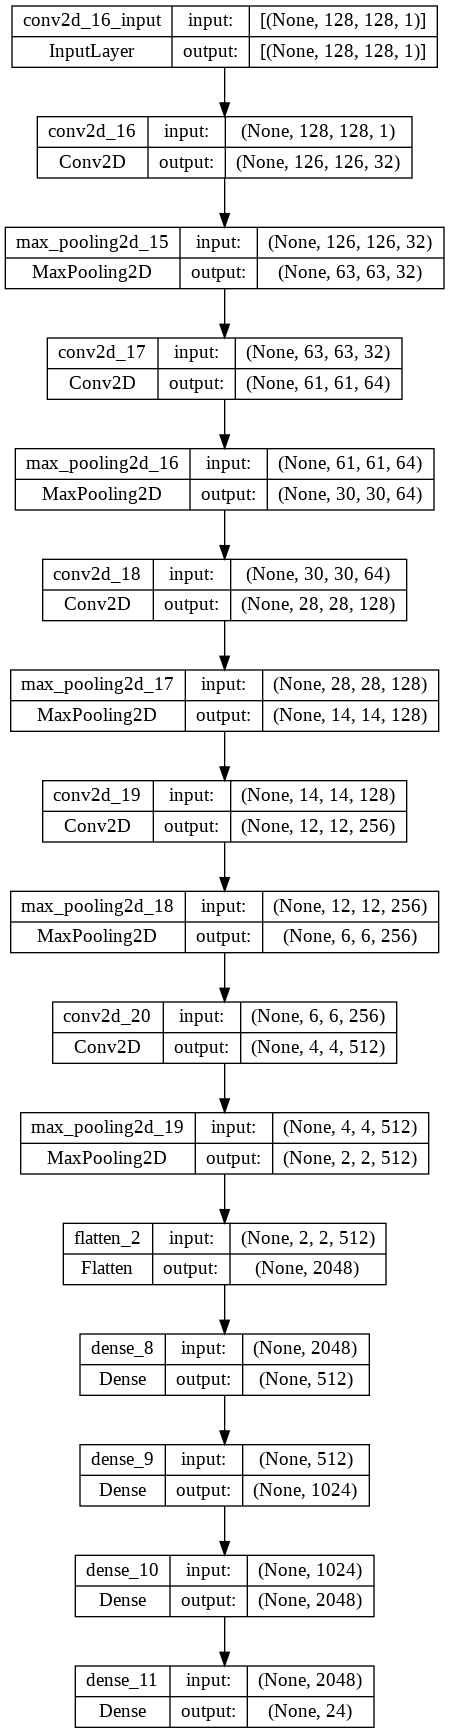

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True)

In [ ]:
#compiling the model
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

In [ ]:
#fitting the model
model.fit(X, y1, batch_size = 32, epochs = 400)

Epoch 1/400
9/9 [==============================] - 5s 69ms/step - loss: 109.2901 - accuracy: 0.1439
Epoch 2/400
9/9 [==============================] - 0s 21ms/step - loss: 82.8907 - accuracy: 0.4394
Epoch 3/400
9/9 [==============================] - 0s 22ms/step - loss: 85.3816 - accuracy: 0.4394
Epoch 4/400
9/9 [==============================] - 0s 23ms/step - loss: 81.4976 - accuracy: 0.4394
Epoch 5/400
9/9 [==============================] - 0s 28ms/step - loss: 69.5611 - accuracy: 0.4848
Epoch 6/400
9/9 [==============================] - 0s 22ms/step - loss: 60.3401 - accuracy: 0.5606
Epoch 7/400
9/9 [==============================] - 0s 26ms/step - loss: 58.2602 - accuracy: 0.5606
Epoch 8/400
9/9 [==============================] - 0s 23ms/step - loss: 59.5610 - accuracy: 0.5606
Epoch 9/400
9/9 [==============================] - 0s 25ms/step - loss: 58.3372 - accuracy: 0.5606
Epoch 10/400
9/9 [==============================] - 0s 24ms/step - loss: 57.4257 - accuracy: 0.5606
Epoch 11

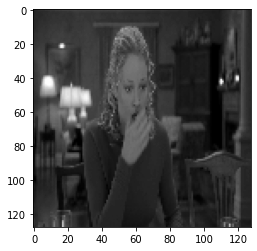

In [ ]:
test_img = img_data[202]
plt.imshow(test_img, cmap = 'gray')

In [ ]:
import tensorflow as tf
test_img = tf.expand_dims(test_img, 0)
print (test_img)
print (test_img.shape)

tf.Tensor(
[[[0.15294118 0.16470589 0.17254902 ... 0.19607843 0.15686275 0.14509805]
  [0.14117648 0.14901961 0.15686275 ... 0.19215687 0.16470589 0.15294118]
  [0.14509805 0.14901961 0.16078432 ... 0.19607843 0.16862746 0.14509805]
  ...
  [0.20784314 0.18039216 0.18431373 ... 0.09411765 0.08627451 0.08627451]
  [0.22352941 0.16862746 0.19215687 ... 0.09803922 0.09411765 0.09411765]
  [0.16862746 0.16470589 0.21568628 ... 0.11372549 0.10980392 0.10980392]]], shape=(1, 128, 128), dtype=float32)
(1, 128, 128)


In [ ]:
bbx_coord = model.predict(test_img)
print (bbx_coord)
print (bbx_coord.shape)

1/1 [==============================] - 0s 186ms/step
[[ 707.8667      0.        341.23315   447.68497  1050.6648     94.11066
     0.         94.899536    0.          0.          0.          0.
     0.          0.          0.          0.          0.          0.
     0.          0.          0.          0.          0.          0.      ]]
(1, 24)


In [ ]:
bbx_coord.transpose()

array([[ 707.8667  ],
       [   0.      ],
       [ 341.23315 ],
       [ 447.68497 ],
       [1050.6648  ],
       [  94.11066 ],
       [   0.      ],
       [  94.899536],
       [   0.      ],
       [   0.      ],
       [   0.      ],
       [   0.      ],
       [   0.      ],
       [   0.      ],
       [   0.      ],
       [   0.      ],
       [   0.      ],
       [   0.      ],
       [   0.      ],
       [   0.      ],
       [   0.      ],
       [   0.      ],
       [   0.      ],
       [   0.      ]], dtype=float32)